In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

In [2]:
dati = pd.read_csv("dati/diabetes.csv")

In [3]:
dati

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dati.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
dati = dati[["Glucose", "BMI", "Age", "Outcome"]]
dati

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1
...,...,...,...,...
763,101,32.9,63,0
764,122,36.8,27,0
765,121,26.2,30,0
766,126,30.1,47,1


In [6]:
X = dati.iloc[: , 0 : 3].values
y =  dati.iloc[:, -1].values
X

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       ...,
       [121. ,  26.2,  30. ],
       [126. ,  30.1,  47. ],
       [ 93. ,  30.4,  23. ]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
yhat = lr.predict(X_test)

In [12]:
import numpy as np
sample = np.array([[93, 30.4, 23]])
lr.predict(sample)

array([0])

In [13]:
from sklearn import metrics

In [14]:
metrics.accuracy_score(yhat, y_test)

0.7922077922077922

In [15]:
cm = metrics.confusion_matrix(yhat, y_test)

In [16]:
cm

array([[95, 20],
       [12, 27]])

In [17]:
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]
print(TN, FN, FP, TP)

95 12 20 27


In [18]:
acc = (TP + TN) / (TP + TN + FN + FP)
acc

0.7922077922077922

In [19]:
metrics.precision_score(yhat, y_test)

0.574468085106383

In [20]:
p = TP / (TP + FP)
p

0.574468085106383

In [21]:
metrics.recall_score(yhat, y_test)

0.6923076923076923

In [22]:
r = TP / (TP + FN)
r

0.6923076923076923

In [23]:
f1_score = 2 * (p * r) / (p + r)
f1_score

0.627906976744186

In [24]:
metrics.f1_score(yhat, y_test)

0.627906976744186

<AxesSubplot:>

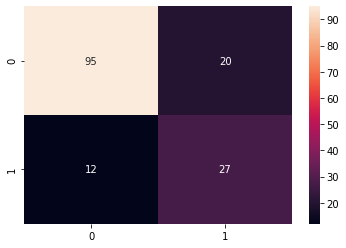

In [25]:
sb.heatmap(cm, annot = True)

### Ottimizzazione precision-recall

In [26]:
lr.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [27]:
lr.predict_proba(X_test)[:10]

array([[0.10082751, 0.89917249],
       [0.80544525, 0.19455475],
       [0.90800861, 0.09199139],
       [0.35129768, 0.64870232],
       [0.85900174, 0.14099826],
       [0.94187603, 0.05812397],
       [0.41741632, 0.58258368],
       [0.17027865, 0.82972135],
       [0.77432116, 0.22567884],
       [0.55590789, 0.44409211]])

In [28]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.89917249, 0.19455475, 0.09199139, 0.64870232, 0.14099826,
       0.05812397, 0.58258368, 0.82972135, 0.22567884, 0.44409211,
       0.5372362 , 0.94374039, 0.29004634, 0.07146826, 0.09276258,
       0.16201616, 0.75736455, 0.03144987, 0.52681538, 0.19432567,
       0.6381754 , 0.41098816, 0.08506732, 0.11092515, 0.06696894,
       0.31672551, 0.06497165, 0.74731144, 0.12389811, 0.14789503,
       0.42500334, 0.25921636, 0.14007892, 0.35804775, 0.12293685,
       0.72427653, 0.40515418, 0.13291739, 0.30420647, 0.72575919,
       0.28116254, 0.22324119, 0.12383941, 0.80568395, 0.88411722,
       0.01148634, 0.10385369, 0.23358311, 0.23751922, 0.29980878,
       0.31660734, 0.18058725, 0.74881232, 0.46649995, 0.20939873,
       0.00397754, 0.07963236, 0.64546759, 0.27374308, 0.02239318,
       0.80057724, 0.53622269, 0.1585969 , 0.45766534, 0.69707121,
       0.77188249, 0.7123885 , 0.21004133, 0.25479483, 0.09810817,
       0.15637308, 0.20999413, 0.13849999, 0.90172907, 0.81736

In [29]:
from sklearn.preprocessing import binarize

In [30]:
y_pred_class = binarize([y_pred_prob], threshold = 0.9)[0]
y_pred_class

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [31]:
metrics.recall_score(y_pred_class, y_test)

0.5

In [32]:
metrics.precision_score(y_pred_class, y_test)

0.02127659574468085

In [33]:
p_no_s = 0.61
r_no_s = 0.76

### Salvare il modello con pickle 

In [34]:
import pickle 

with open("logregdb.pkl", "wb") as file: 
    pickle.dump(lr, file)